In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [5]:
#define folder and url text files for the image dataset. 
folder = 'soccer'
file = 'soccer.txt'
path = Path('data/sports/')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

#download the urls for soccer.txt 
download_images(path/file, dest, max_pics=200)


Error http://www.soccertrainingsolutions.com/wp-content/uploads/2017/11/131108-F-SI013-476-1024x731.jpg 'content-length'
Error https://fm.cnbc.com/applications/cnbc.com/resources/img/editorial/2018/06/29/105304108-makeit_06282018_RonaldothaGod_mezz.jpg?v=1530307096 'content-length'
Error https://powerpoint.crystalgraphics.com/template/bxccbxdef_largest.jpg 'content-length'
Error https://bloximages.chicago2.vip.townnews.com/meridianstar.com/content/tncms/assets/v3/editorial/1/c3/1c3362e2-c1ba-11e8-af99-87a938865572/5babd04b7a183.image.jpg?resize=1200%2C800 'content-length'
Error https://www.thechristiancenter.cc/templates/jsn_blank_pro/images/soccer-1.jpg 'content-length'
Error https://www.gokid.mobi/wp-content/uploads/2018/07/soccer-2093952_640.jpg 'content-length'
Error https://c8.alamy.com/comp/C397JD/interracial-black-boys-age-9-playing-soccer-with-white-boys-st-paul-C397JD.jpg 'content-length'


In [7]:
folder = 'rugby'
file = 'rugby.txt'
path = Path('data/sports/')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(path/file, dest, max_pics=200)

Error https://cdn-img.usarugby.org/i-want-to-play.jpg HTTPSConnectionPool(host='cdn-img.usarugby.org', port=443): Max retries exceeded with url: /i-want-to-play.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'ssl3_get_server_certificate', 'certificate verify failed')],)",),))
Error https://imagesvc.timeincapp.com/v3/mm/image?url=https%3A%2F%2Fimages.hellogiggles.com%2Fuploads%2F2016%2F09%2F15040655%2Frugby-kid.jpg&w=700&c=sc&poi=face&q=85 'content-length'
Error https://radio.rte.ie/radio1highlights/wp-content/uploads/sites/3/2017/02/ronan-ogara-2-gettyimages-734.jpg 'content-length'
Error https://c8.alamy.com/comp/D731HK/a-john-carroll-player-r-carries-the-ball-against-a-hyde-school-player-D731HK.jpg 'content-length'
Error https://lookaside.fbsbx.com/lookaside/crawler/media/?media_id=1744193385611693 'content-length'
Error x-raw-image:///9c86d1ca256c3c79f7f75b95fa7244ea18ae3139c0c792d1fc5cceea6bf3b15d No connection adapters were found for 'x-raw-image:///9c86d

In [8]:
folder = 'americanfootball'
file = 'americanfootball.txt'
path = Path('data/sports/')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(path/file, dest, max_pics=200)

Error http://cdn1.bloguin.com/wp-content/uploads/sites/42/2017/01/american-football-573778_960_720.jpg 'content-length'
Error https://images.pexels.com/photos/163517/american-football-running-back-player-ball-carrier-163517.jpeg?cs=srgb&dl=athlete-ball-field-163517.jpg&fm=jpg 'content-length'
Error https://static.businessinsider.com/image/5672980e5afbd3f2528b4570-750.jpg 'content-length'
Error https://fm.cnbc.com/applications/cnbc.com/resources/img/editorial/2017/08/25/104673823-thumbnail.940x528.jpg?v=1503692662 'content-length'
Error https://lookaside.fbsbx.com/lookaside/crawler/media/?media_id=10160667172915214 'content-length'
Error http://www.americanfootballinternational.com/wp-content/uploads/2016/02/AFI-Star-Lotulelei-%E2%80%93-Carolina-Panthers.jpg 'content-length'
Error https://www.thenational.ae/image/policy:1.661345:1506303555/wo25-US-Black-Sport.jpg?f=16x9&w=1200&$p$f$w=6760719 'content-length'
Error https://lookaside.fbsbx.com/lookaside/crawler/media/?media_id=11934221174

In [9]:
#remove files that won't be identified in each of the data classes
classes = ['soccer','rugby','americanfootball']
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_workers=8)

soccer


cannot identify image file '/storage/sports/soccer/00000005.jpg'
cannot identify image file '/storage/sports/soccer/00000078.jpg'
cannot identify image file '/storage/sports/soccer/00000052.jpg'
cannot identify image file '/storage/sports/soccer/00000024.jpg'
cannot identify image file '/storage/sports/soccer/00000036.jpg'
cannot identify image file '/storage/sports/soccer/00000044.jpg'
cannot identify image file '/storage/sports/soccer/00000015.jpg'
cannot identify image file '/storage/sports/soccer/00000060.jpg'
rugby


cannot identify image file '/storage/sports/rugby/00000005.jpg'
cannot identify image file '/storage/sports/rugby/00000035.jpg'
americanfootball


cannot identify image file '/storage/sports/americanfootball/00000081.jpg'
cannot identify image file '/storage/sports/americanfootball/00000091.jpg'
cannot identify image file '/storage/sports/americanfootball/00000026.jpg'
cannot identify image file '/storage/sports/americanfootball/00000027.jpg'
cannot identify image file '/storage/sports/americanfootball/00000012.jpg'
cannot identify image file '/storage/sports/americanfootball/00000009.jpg'


In [10]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [11]:
#the three data classes
data.classes

['americanfootball', 'rugby', 'soccer']

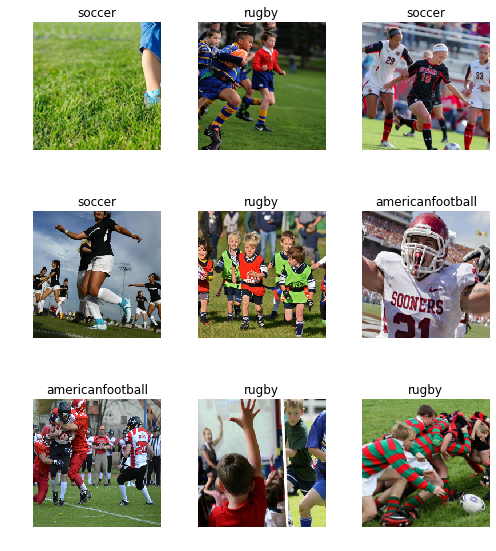

In [12]:
#showing a sample batch
data.show_batch(rows=3, figsize=(7,8))

In [13]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['americanfootball', 'rugby', 'soccer'], 3, 202, 59)

In [14]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [15]:
learn.fit_one_cycle(4)

Total time: 00:34
epoch  train_loss  valid_loss  error_rate
1      1.183934    0.814178    0.305085    (00:09)
2      0.941091    0.471782    0.186441    (00:07)
3      0.715868    0.450559    0.152542    (00:08)
4      0.615085    0.488493    0.169492    (00:08)



In [16]:
learn.save('stage-1')

In [17]:
learn.unfreeze()

In [18]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


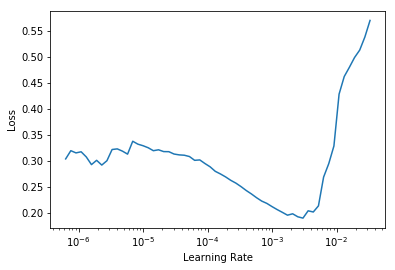

In [19]:
learn.recorder.plot()

In [20]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

Total time: 00:16
epoch  train_loss  valid_loss  error_rate
1      0.287208    0.517890    0.186441    (00:08)
2      0.254580    0.519668    0.186441    (00:07)



In [21]:
learn.save('stage-2')

In [23]:
learn.load('stage-2')

In [24]:
interp = ClassificationInterpretation.from_learner(learn)

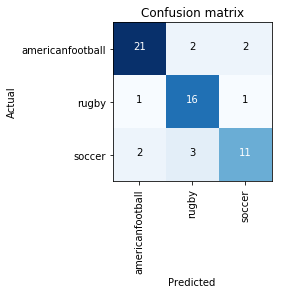

In [25]:
#plotting a confusion matrix
interp.plot_confusion_matrix()

In [26]:
from fastai.widgets import *

losses,idxs = interp.top_losses()
top_loss_paths = data.valid_ds.x[idxs]

In [27]:
#using a file deleter to delete the top losses
fd = FileDeleter(file_paths=top_loss_paths)

Button(button_style='primary', description='Confirm', style=ButtonStyle())

In [33]:
fd = FileDeleter(file_paths=top_loss_paths)

Button(button_style='primary', description='Confirm', style=ButtonStyle())

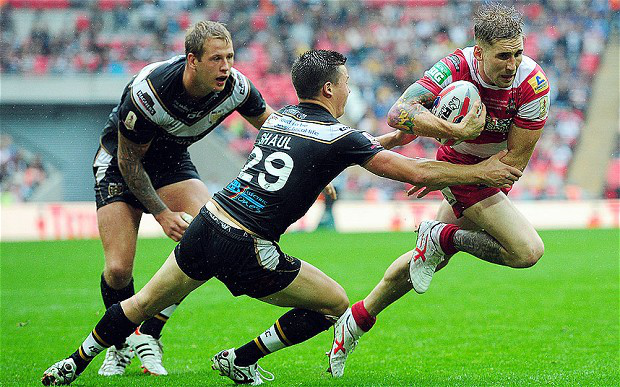

In [38]:
#load an rugby image from the data
img = open_image(path/'rugby'/'00000021.jpg')
img

In [39]:
# load the model for testing the prediction
classes = ['soccer', 'rugby', 'americanfootball']
data2 = ImageDataBunch.single_from_classes(path, classes, tfms=get_transforms(), size=224).normalize(imagenet_stats)
learn = create_cnn(data2, models.resnet34)
learn.load('stage-2')

In [40]:
# predict the test image from the model
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

'rugby'